# Map Green Sites in Oxfordshire
Green Sites data from:
https://www.ordnancesurvey.co.uk/business-and-government/products/os-open-greenspace.html
Contains Ordnance Survey data © Crown copyright and database right 2018

In [1]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt

In [2]:
df_wards = gp.GeoDataFrame.from_file('data/oxford_wards.shp')
df_wards.head()

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1,geometry
0,Watchfield & Shrivenham Ward,DIW,District Ward,OXFORDSHIRE_COUNTY,1.0,502.0,126167.0,8592.0,E05009776,9945.987,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((424256.5987316867 186172.6978748109,..."
1,Stanford Ward,DIW,District Ward,OXFORDSHIRE_COUNTY,3.0,503.0,126171.0,8578.0,E05009770,4904.378,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((429912.4962754526 183252.7037144447,..."
2,Thames Ward,DIW,District Ward,OXFORDSHIRE_COUNTY,7.0,504.0,126169.0,8622.0,E05009773,7341.527,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((435788.0010216464 195124.8953349439,..."
3,Ridgeway Ward,DIW,District Ward,OXFORDSHIRE_COUNTY,39.0,511.0,126168.0,8566.0,E05009769,5984.525,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((431866.5015508634 189607.8045857432,..."
4,Wantage Charlton Ward,DIW,District Ward,OXFORDSHIRE_COUNTY,41.0,513.0,49231.0,8562.0,E05009775,1090.960,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((438865.4041171432 187297.3959333405,..."


In [3]:
df_green = gp.GeoDataFrame.from_file('data/greenspace_site.shp')
df_green.head()

,id,function,distName1,distName2,distName3,distName4,geometry
0,64C8F68F-D001-6BEA-E053-A03BA40A2DD7,Play Space,None,None,None,None,"POLYGON Z ((445964 244139.79 0, 445985.23 2441..."
1,64C8F68F-D251-6BEA-E053-A03BA40A2DD7,Playing Field,None,None,None,None,"POLYGON Z ((449193.55 245859.38 0, 449191 2458..."
2,64C8F68F-D274-6BEA-E053-A03BA40A2DD7,Allotments Or Community Growing Spaces,None,None,None,None,"POLYGON Z ((449379.85 246008.55 0, 449388.49 2..."
3,64C8F64E-7209-6BEA-E053-A03BA40A2DD7,Play Space,None,None,None,None,"POLYGON Z ((449157.28 246065.39 0, 449134.42 2..."
4,64C8F68F-D184-6BEA-E053-A03BA40A2DD7,Allotments Or Community Growing Spaces,None,None,None,None,"POLYGON Z ((449018.03 246261.1 0, 449011.77 24..."


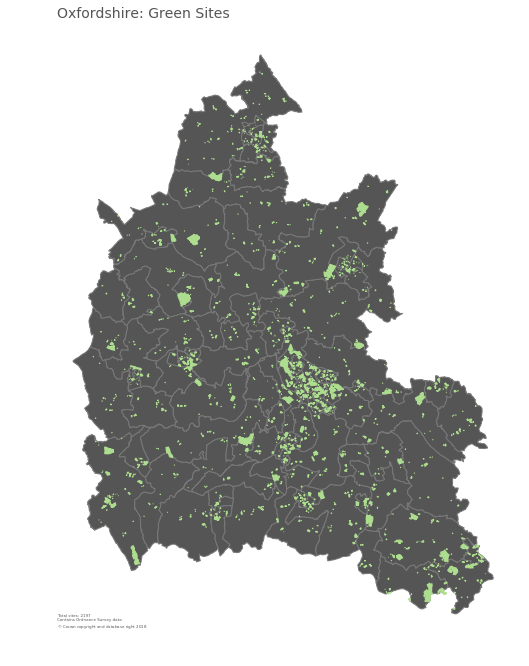

In [4]:
plt.clf()
#fig = plt.figure()
#ax = fig.add_subplot(111, facecolor='w', frame_on=False)

fig, ax = plt.subplots(1)
# Plot polygons in light grey
ax.set_axis_off()
ax.set_aspect('equal')

df_wards.plot(ax=ax, color='#555555', edgecolor='#787878')
df_green.plot(ax=ax, color='#addd8e', edgecolor='#addd8e')

# copyright and source data info
smallprint = ax.text(
    0.01, 0.01,
    'Total sites: %s\nContains Ordnance Survey data\n$\copyright$ Crown copyright and database right 2018\n'% len(df_green),
    ha='left', va='bottom',
    size=4,
    color='#555555',
    transform=ax.transAxes)

maptitle = ax.text(
    0.01, 1.01,
    'Oxfordshire: Green Sites',
    ha='left', va='bottom',
    size=14,
    color='#555555',
    transform=ax.transAxes)

plt.tight_layout()
# this will set the image width to 722px at 100dpi
fig.set_size_inches(8, 10)
plt.savefig('images/oxon_greenspaces.png', dpi=300, alpha=True)